In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

data=pd.read_excel('d13C_open_ocean.xlsx')
data2= pd.read_excel('filtered_data (2).xlsx')
data2=pd.read_excel('rivers_only.xlsx')

/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


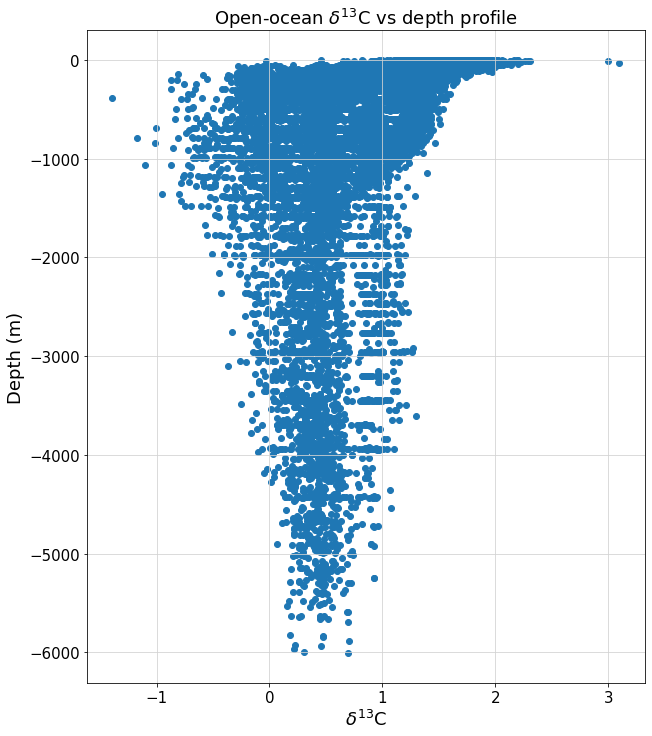

In [2]:
#open ocean d13C vs depth: bio pump
x=data['d13C']
y=-data['Depth']

fig, ax = plt.subplots(figsize=(10,12))
plt.scatter(x,y)

#make pretty
plt.ylabel('Depth (m)',fontsize=18)
plt.xlabel('$\delta^{13}$C',fontsize=18)
plt.title('Open-ocean $\delta^{13}$C vs depth profile',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')


In [3]:
#ocean
# define input conditions; DIC and Alk
kwargs = dict(
    par1 = data['DIC'],
    par1_type = 2, 
    par2 = data['Alk'],
    par2_type = 1,
)
print("Conditions have been defined: Alkalinity and DIC")

Conditions have been defined: Alkalinity and DIC


In [4]:
# Import PyCO2SYS

import PyCO2SYS as pyco2

# Run PyCO2SYS

results = pyco2.sys(**kwargs)


# Extract and print out the result
pH_calc = np.array(results['pH'])

In [5]:
#calculate d13C_pred_ocean

T=25    #degree C
S=35    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
# print(d13C_DIC_pred)

In [6]:
#calculate residual
r = np.array(data['d13C']) - np.array(d13C_DIC_pred)
print('length of open ocean data = ',len(r))

length of open ocean data =  11583


In [7]:
#make purple d13C_DIC equil line

T=25    #degree C
S=35    #PSS
DIC=2100 #micromol/kg
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = np.arange(4,11,.1)
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

# print('d13C of DIC = ',d13C_DIC)

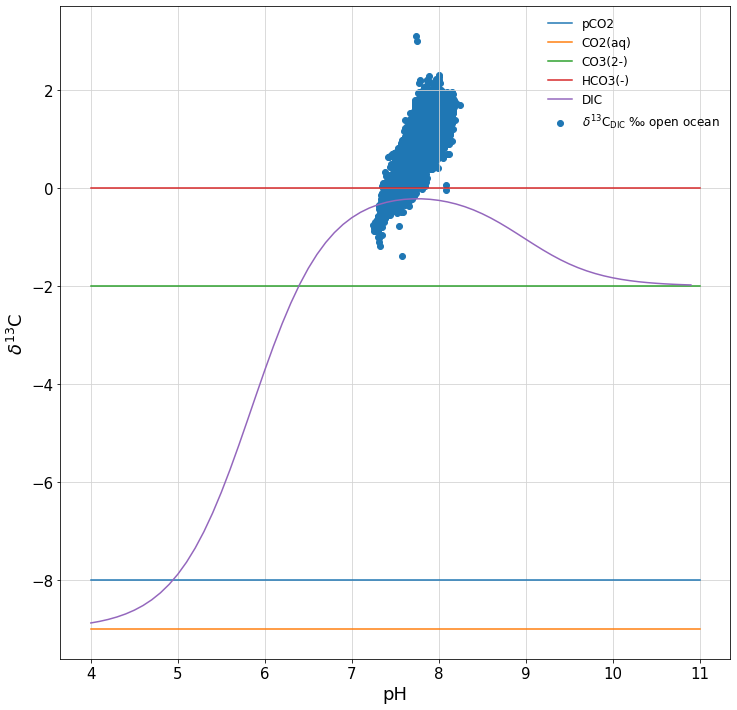

In [8]:
#plot ocean data on ph vs d13C plot
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,data['d13C'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ open ocean')



plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)

In [9]:
# rivers

#define input conditions; DIC and Alk
kwargs = dict(
#     par1 = data2['DIC_trans1'],
    par1 = data2['DIC_transformed'],
    par1_type = 2, 
#     par2 = data2['Alk_trans1'],
    par2 = data2['Alk_trans'],
    par2_type = 1,
    salinity = 0,
    temperature = 4,
)
print("Conditions have been defined: Alkalinity and DIC")

Conditions have been defined: Alkalinity and DIC


In [10]:
# Import PyCO2SYS

import PyCO2SYS as pyco2

# Run PyCO2SYS
results2 = pyco2.sys(**kwargs)

# Extract and print out the result
pH2 = np.array(results2['pH'])

In [11]:
#calculate d13C_pred_rivers

T=25    #degree C
S=35    #PSS
TK = T + 273.15 
DIC=np.array(data2['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH2)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred_2 = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
# print(d13C_DIC_pred)

In [12]:
#calculate residual for rivers
r2 = np.array(data2['d13C_DIC']) - np.array(d13C_DIC_pred_2)
print('amt of river data with DIC and Alk = ',len(r2),'/ 4,085')

amt of river data with DIC and Alk =  4594 / 4,085


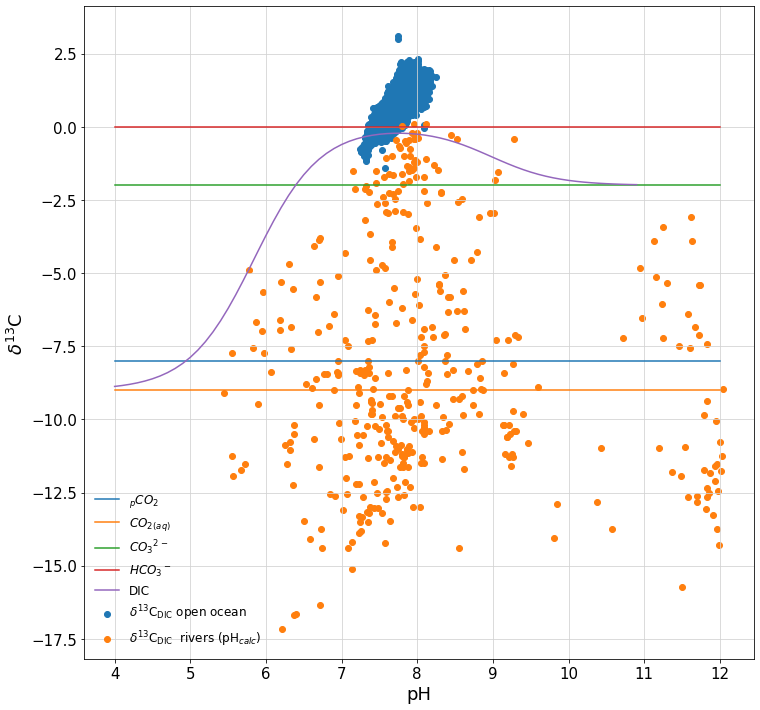

In [13]:
#plot ocean AND river data on ph vs d13C plot
#(where both have d13C calculated from calculated pH)
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,12)


plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,data['d13C'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ open ocean')
plt.scatter(pH2,data2['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$  rivers (pH$_{calc}$)')


plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)

(2.0, 12.0)

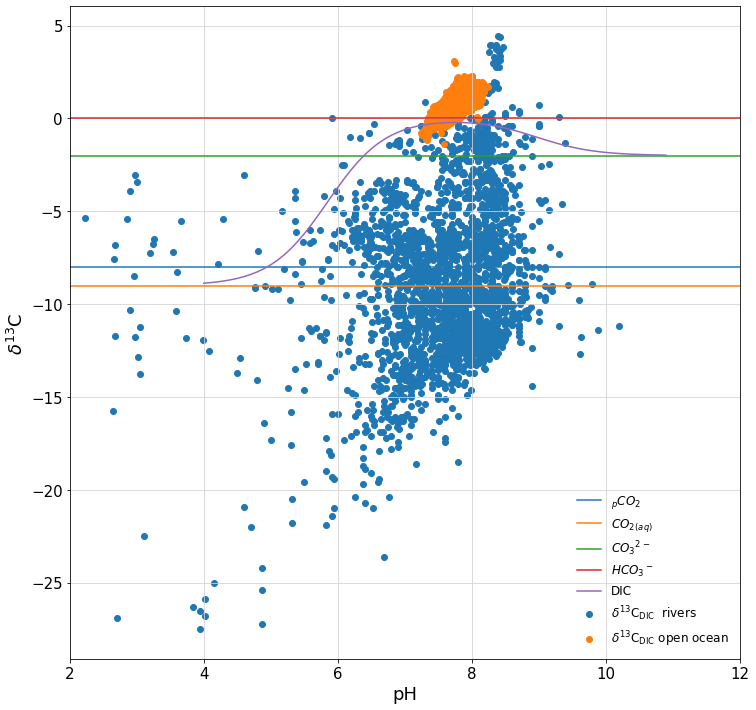

In [14]:
data3 = pd.read_excel('rivers_only.xlsx')
#plot ocean AND river data on ph vs d13C plot
#where pH for rivers is measured

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(2,12)


plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')

plt.scatter(data3['pH'],data3['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$  rivers')
plt.scatter(pH_calc,data['d13C'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ open ocean')


plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)
plt.xlim(2,12)


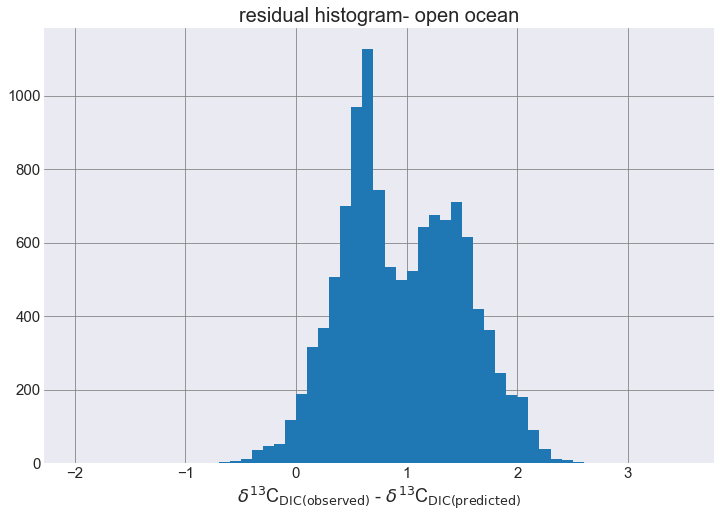

In [15]:
# open ocean histogram
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
x_grid=np.arange(-2,3.6,0.1)
plt.hist(r,bins=x_grid)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlim(-15,0)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram- open ocean', fontsize=20)
plt.grid(color='grey')


In [16]:
#manually compute kde- open ocean residual
fun=stats.gaussian_kde(np.array(r))
#fun is now like a function...
#can pass in any x value and it will give back pdf
x=np.arange(-1.16,3.32,.01)

y=fun(x)

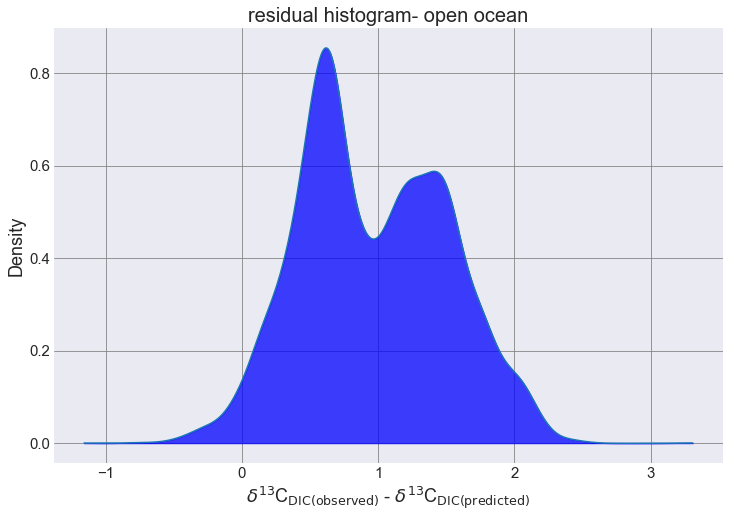

In [17]:
#Ocean KDE plot

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))

plt.plot(x,y)
plt.fill_between(x,y,color='b',alpha=.75)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram- open ocean', fontsize=20)
plt.grid(color='grey')


(-25.0, 10.0)

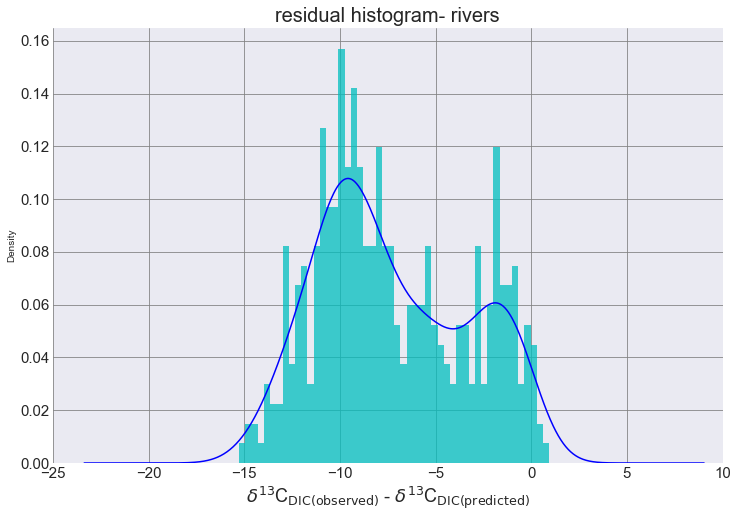

In [18]:
#rivers histogram
data = pd.Series(r2)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
data.plot(kind='hist',density=True,bins=50,facecolor='c',alpha=0.75)
data.plot(kind = "kde",color='b')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram- rivers', fontsize=20)
plt.grid(color='grey')
plt.xlim(-25,10)


In [19]:
#manually compute kde
fun=stats.gaussian_kde(np.array(r2))
#fun is now like a function...
#can pass in any x value and it will give back pdf
x2=np.arange(-25,10,.1)

y2=fun(x2)

ValueError: array must not contain infs or NaNs

In [20]:
#rivers KDE plot


plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))

plt.plot(x2,y2)
plt.fill_between(x2,y2,color='c',alpha=.75)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram- rivers', fontsize=20)
plt.grid(color='grey')


NameError: name 'x2' is not defined

<Figure size 864x576 with 0 Axes>

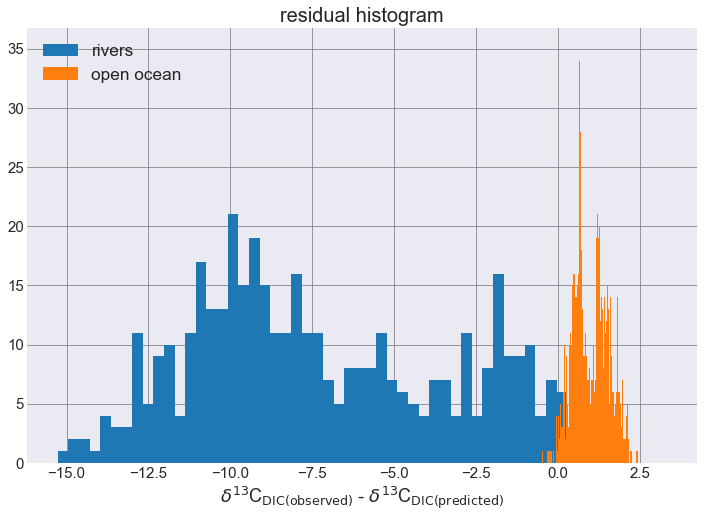

In [21]:
#ocean and rivers
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r2,bins=50,label='rivers')
plt.hist(r,bins=2500,label='open ocean')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# '$\delta^{13}$C$_{\mathrm{DIC observed}}$ - $\delta^{13}$C$_{\mathrm{DIC predicted}}$'
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram', fontsize=20)
plt.grid(color='grey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)

In [22]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))

plt.plot(x2,y2/np.max(y2),color='b')
plt.fill_between(x2,y2/np.max(y2),color='c',alpha=.75)

plt.plot(x,y/np.max(y),color='b')
plt.fill_between(x,y/np.max(y),color='b',alpha=.75)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Density',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.title('residual histogram- rivers', fontsize=20)
plt.grid(color='grey')

NameError: name 'x2' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
data=pd.read_excel('d13C_open_ocean.xlsx')
data2= pd.read_excel('filtered_data (2).xlsx')
#manually compute kde
fun=stats.gaussian_kde(data['d13C'])
#fun is now like a function...
#can pass in any x value and it will give back pdf
x=np.arange(-1.16,3.32,.01)

y=fun(x)

#manually compute kde
fun=stats.gaussian_kde(np.array(data2['d13C_DIC']))
#fun is now like a function...
#can pass in any x value and it will give back pdf
x2=np.arange(-25,10,.1)

y2=fun(x2)

In [ ]:
#just the data!
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))


plt.plot(x2,y2/np.max(y2),color='c',label='Rivers')
plt.fill_between(x2,y2/np.max(y2),color='c',alpha=.75)

plt.plot(x,y/np.max(y),color='b',label='Open Ocean')
plt.fill_between(x,y/np.max(y),color='b',alpha=.75)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('Density',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC}}$ (‰)',fontsize=18)
plt.title('Variability in $\delta^{13}$C$_{\mathrm{DIC}}$ in Rivers and Open Ocean', fontsize=20)
plt.grid(color='lightgrey')
plt.legend(loc='upper left',fontsize=18,frameon=False)

In [18]:
#ph residual
r_ph = data3['pH'] - pH2

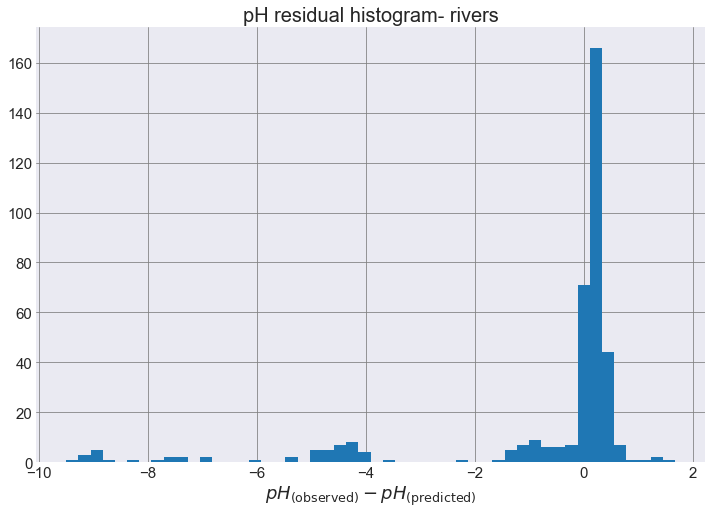

In [19]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(r_ph,bins=50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlim(-15,0)
plt.xlabel('$pH_{\mathrm{(observed)}} - pH_{\mathrm{(predicted)}}$',fontsize=18)
plt.title('pH residual histogram- rivers', fontsize=20)
plt.grid(color='grey')

ValueError: x and y must be the same size

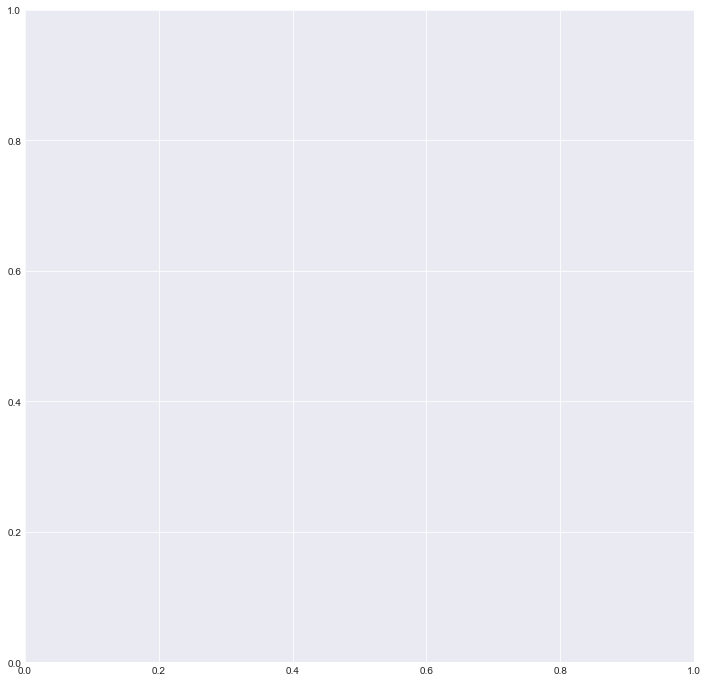

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(r_ph, data2['d13C_DIC'])
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('$pH_{\mathrm{(observed)}} - pH_{\mathrm{(predicted)}}$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.xlim(-2,3)


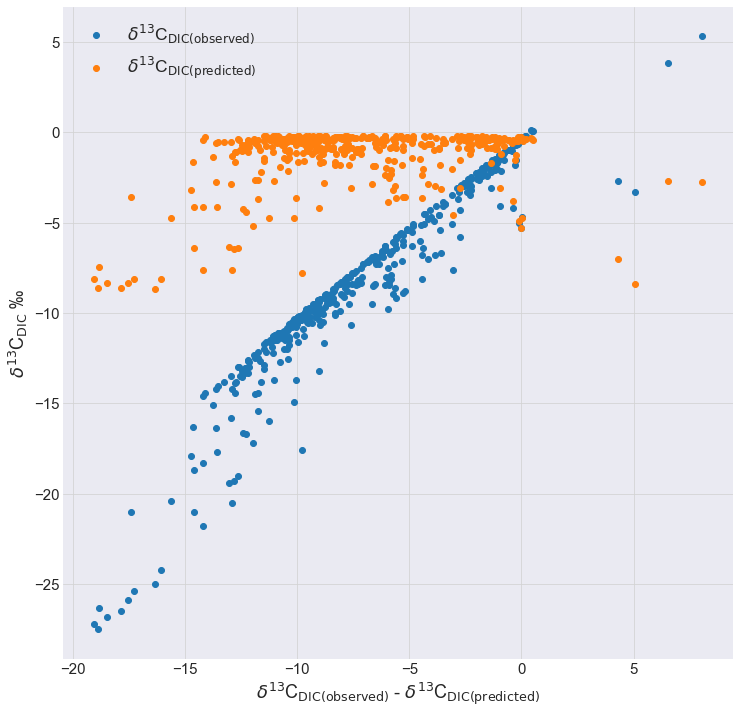

In [29]:
plt.figure(figsize=(12,12))
#d13C_observed on y
plt.scatter(r2, data2['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC (observed)}}$')
#d13C predicted on y
plt.scatter(r2, d13C_DIC_pred_2,label='$\delta^{13}$C$_{\mathrm{DIC (predicted)}}$')
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)

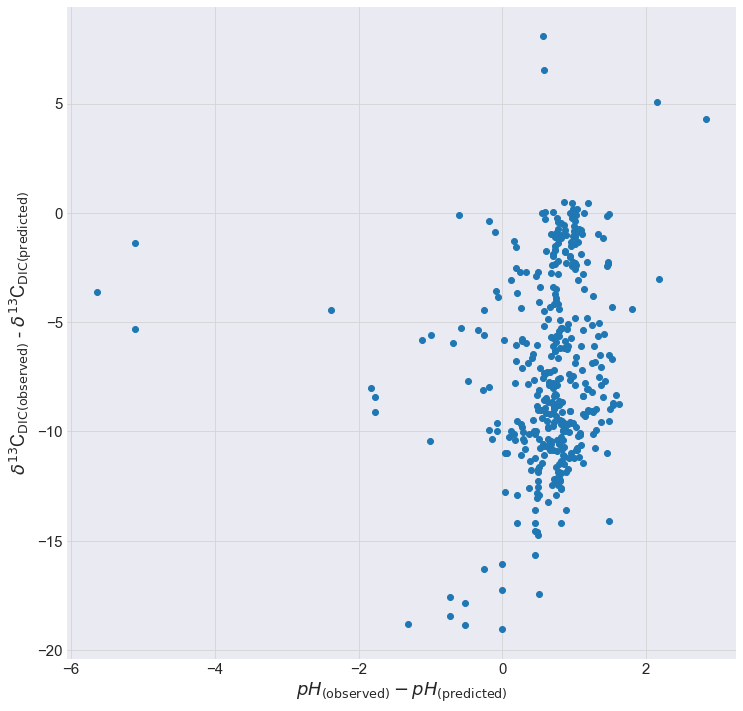

In [30]:
plt.figure(figsize=(12,12))
plt.scatter(r_ph,r2)
plt.xlabel('$pH_{\mathrm{(observed)}} - pH_{\mathrm{(predicted)}}$',fontsize=18)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')

In [31]:
# plt.figure(figsize=(12,12))
# plt.scatter(r, data['d13C'])
# plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
# plt.xlabel('$\delta^{13}$C$_{\mathrm{DIC (observed)}}$ - $\delta^{13}$C$_{\mathrm{DIC (predicted)}}$',fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.grid(color='lightgrey')


In [32]:
# s = pd.Series(r2)
# ax = s.plot.kde()